# Air Quality MOSM

Experiment on mosm 

Autor:Alejandro Cuevas

##  Notes on the use os the toolbox

* `model.remove_slabs`  has no parameters
* `model.predict` is not clear on the format of the argument
* When feeding data to the model, the input is a list of ndarrays
    * In predict, it appears only numpy array is used
* When predicting, the output array is not of the output dimension, is a flattened version
* comment the code only if unexpected

In [1]:
# remove in the future
# should not be neccesary 
import sys
sys.path.insert(0, '../')

In [2]:
import mogptk

import os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


%reload_ext autoreload
%autoreload 2

In [3]:
os.makedirs('output', exist_ok=True)

In [4]:
# plot config
sns.set_context('paper', font_scale=1.3)
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (10, 5)

2. __CO(GT)__ True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3. __PT08.S1(CO)__ PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4. __NMHC(GT)__ True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5. __C6H6(GT)__ True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6. __PT08.S2(NMHC)__ PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7. __NOx(GT)__ True hourly averaged NOx concentration in ppb (reference analyzer)
8. __PT08.S4(NO2)__ PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9. __NO2(GT)__ True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10. __PT08.S4(NO2)__ PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11. __PT08.S5(O3)__ PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12. __T__ Temperature in Â°C
13. __RH__ Relative Humidity (%)
14. __AH__ AH Absolute Humidity 

In [5]:
df = pd.read_csv('data/AirQualityUCI.csv', delimiter=';')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


Erase the last 2 columns, as they are only NaNs

In [6]:
df = df.iloc[:, :-2]

Check the NaNs per column

In [7]:
df.isnull().sum(0)

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

Check NaNs per row

Text(0, 0.5, 'NaNs')

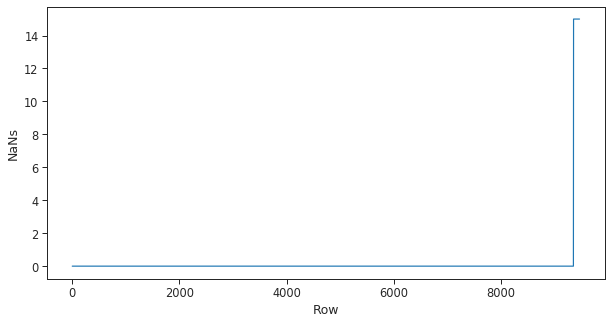

In [8]:
plt.plot(df.isnull().sum(1))
plt.xlabel('Row')
plt.ylabel('NaNs')

As the NaNs are only in the last rows, and are in all values, lets erase them

In [9]:
# drop the rows with nan values
df.dropna(inplace=True)

In [10]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


The first 2 columns are 'date' and 'time', first we will convert them to only hours

In [11]:
df.iloc[:, :2].dtypes

Date    object
Time    object
dtype: object

In order to do regression, first we obtain convert the hours to pandas format, then we obtain the cumulative value.
This is done to do the GP regression taking the hour as the input.

In [12]:
# convert time and date columns to datetime format
dates = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')
# define a initial date to compare all other to
ini_date = pd.Timestamp('2004-03-10 00:00:00.0')

In [13]:
# convert string to hour and get acumulative value
df['timedate'] = dates = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')

# get elapsed hours
df['time'] = (dates - ini_date) / pd.Timedelta(hours=1)

# drop useless columns
df.drop(columns=['Time', 'Date'], inplace=True)

In [14]:
# check data types
df.dtypes

CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
timedate         datetime64[ns]
time                    float64
dtype: object

We check the number of missing values per column, registered as -200 (minimun value of the sensor)

In [15]:
(df == -200).sum(0)

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
timedate            0
time                0
dtype: int64

In [16]:
df.shape

(9357, 15)

### MOSM data structure

MOGP toolbox uses the following structure:
Given $m$ channels, each one with its inputs $x_i$ and output $y_i$, $i=1,\ldots,m$. The toolbox uses to train

* list of inputs $x$.
* list of outputs $y$.
* Number of components $Q$

### Data to use

* As outputs we will use the ground thruth of: CO, NMHC, C6H6, NOx, NO2
* I a first experiment will only use time as input.

In [17]:
# we use the first 200 rows, the first 3 days
n_experiment = 200
ini_t = 300
df2 = df.iloc[ini_t:n_experiment + ini_t]

In [18]:
# fix random seed
np.random.seed(3)

# columns to use
cols = ['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']

# class for storing data
data = mogptk.Data()

for i, c in enumerate(cols):
    # index of non-missing values
    idx = (df2[c] != -200)
    
    print('Channel {} with {} non-missing values'.format(c, idx.sum()))
    
    # add data to the model
    x = df2['time'][idx].values
    y = df2[c][idx].values
    
    data.add(x, y)

print('Number of channels:', data.get_output_dimensions())

Channel CO(GT) with 196 non-missing values
Channel NMHC(GT) with 200 non-missing values
Channel C6H6(GT) with 200 non-missing values
Channel NOx(GT) with 192 non-missing values
Channel NO2(GT) with 192 non-missing values
Number of channels: 5


In [21]:
# randomly sample from the data
for i in range(5):
    data.remove_randomly(channel=i, pct=0.7)

# drop chunks to simulate sensor failure
data.remove_range(0, 425, 460)
data.remove_range(1, 480, None)
data.remove_range(2, 480, None)
data.remove_range(3, 480, None)
data.remove_range(4, None, 350)

Text(0.5, 0.95, 'Training points on Air Quality Data')

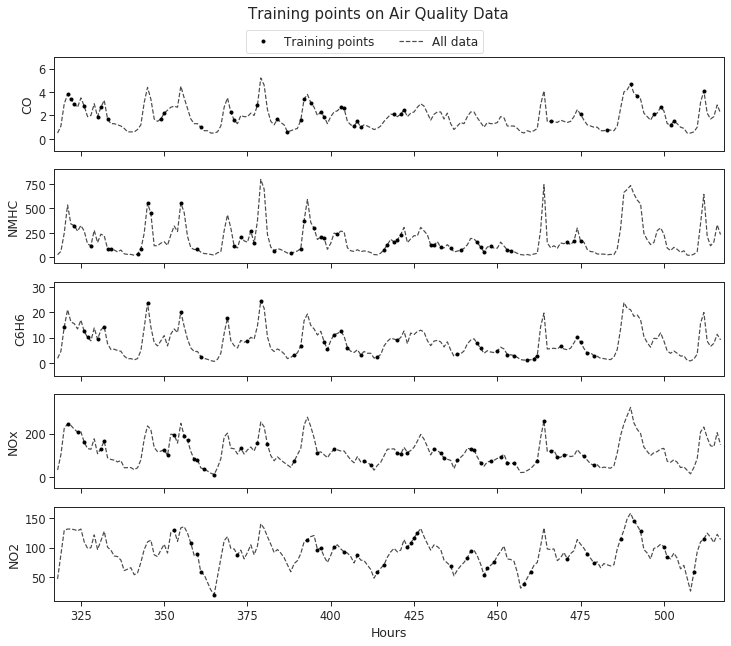

In [22]:
# plot kept values
f, axarray = plt.subplots(5, 1, sharex=True, figsize=(12, 10))

ylims = [(-1, 7), (-60, 900), (-5, 32), (-50, 380), (10, 170)]

for i in range(5):
    axarray[i].plot(data.X[i], data.Y[i], '.k', ms=6, label='Training points')
    # plot ground truth will all data
    idx = df2[cols[i]]!= -200
    axarray[i].plot(df2['time'][idx], df2[cols[i]][idx], '--k', label='All data', alpha=0.7)
    axarray[i].set_ylabel(cols[i][:-4])
    axarray[i].set_ylim(ylims[i])

plt.legend(fontsize=12, ncol=4, bbox_to_anchor=(0.15, 5.65, 0.5, 0.5))
plt.xlabel('Hours')
plt.xlim(df2['time'].values[0] - 1, df2['time'].values[-1] + 1)
plt.suptitle('Training points on Air Quality Data', y=0.95)

__Define model__

In [23]:
kernel = mogptk.MOSM(data, components=3) # kernel
model_mosm = mogptk.Model(data, kernel) # model

(193, 2) (193, 1)


__Optimice__

In [25]:
# optimizers: 'adam', 'L-BFGS-B' 
model_mosm.optimize(optimizer='adam', maxiter=3000, learning_rate=0.001)

__Predict on all hours__

In [37]:
n_res = 500
model_mosm.set_prediction_range(0, df2['time'].values[0], df2['time'].values[-1], n=n_res)
model_mosm.set_prediction_range(1, df2['time'].values[0], df2['time'].values[-1], n=n_res)
model_mosm.set_prediction_range(2, df2['time'].values[0], df2['time'].values[-1], n=n_res)
model_mosm.set_prediction_range(3, df2['time'].values[0], df2['time'].values[-1], n=n_res)
model_mosm.set_prediction_range(4, df2['time'].values[0], df2['time'].values[-1], n=n_res)

# predict
model_mosm.predict()

In [46]:
model_mosm.Y_mu_pred[0].shape

(201,)

In [24]:
y_pred2 = Y_pred.reshape(5, -1).T
std_pred2 = STD_pred.reshape(5, -1).T

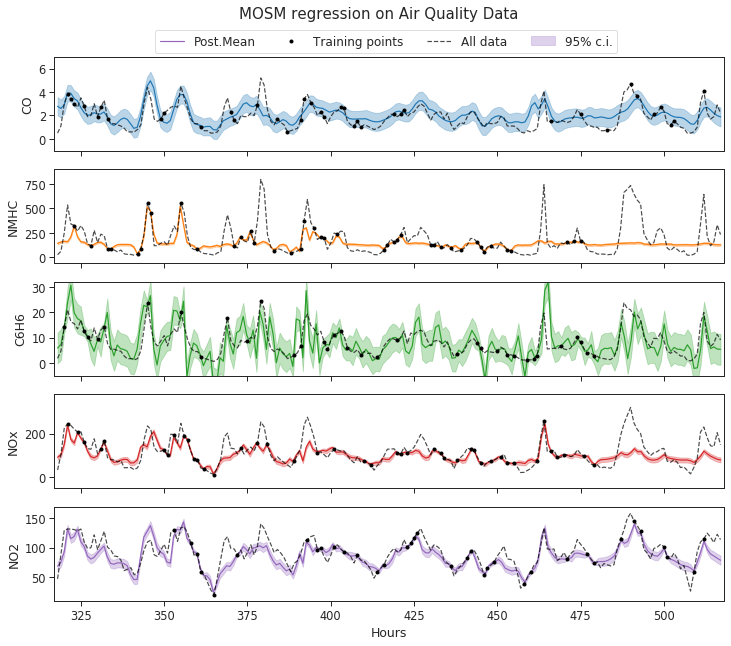

In [53]:
f, axarray = plt.subplots(5, 1, sharex=True, figsize=(12, 10))

for i in range(5):
    # plot post mean
    axarray[i].plot(model_mosm.X_pred[i] ,model_mosm.Y_mu_pred[i], label='Post.Mean', c=sns.color_palette()[i])
    # error bars
    axarray[i].fill_between(model_mosm.X_pred[i],
                            model_mosm.Y_mu_pred[i] + 2 * np.sqrt(model_mosm.Y_var_pred[i]),
                            model_mosm.Y_mu_pred[i] - 2 * np.sqrt(model_mosm.Y_var_pred[i]),
                            alpha=0.3,
                            label='95% c.i.',
                            color=sns.color_palette()[i]
                           )
    # plot trainning points
    axarray[i].plot(data.X[i], data.Y[i], '.k', ms=6, label='Training points')
    # plot ground truth will all data
    idx = df2[cols[i]]!= -200
    axarray[i].plot(df2['time'][idx], df2[cols[i]][idx], '--k', label='All data', alpha=0.7)
    
    axarray[i].set_ylabel(cols[i][:-4])
    axarray[i].set_ylim(ylims[i])

plt.legend(fontsize=12, ncol=4, bbox_to_anchor=(0.35, 5.65, 0.5, 0.5))
plt.xlabel('Hours')
plt.xlim(df2['time'].values[0] - 1, df2['time'].values[-1] + 1)
plt.suptitle('MOSM regression on Air Quality Data', y=0.95)
plt.savefig('output/air_quality_mosm.pdf', bbox_inches='tight')

### Get MAE

Mean absolute error per channel

In [26]:
# generate inputs in the same points as the training set
X_pred = np.tile(df2['time'].values, 5)
channels = np.empty(0)

for i in range(5):
    channels = np.r_[channels, np.ones(len(df2['time'].values)) * i]
    
X_pred = np.c_[channels, X_pred]

In [27]:
# predict
Y_pred, STD_pred = model.predict(X_pred)

# transform
y_pred2 = Y_pred.reshape(5, -1).T
std_pred2 = STD_pred.reshape(5, -1).T

In [28]:
# obtain MAE
for i, c in enumerate(cols):
    idx = df2[c] != -200
    error = np.abs(df2[c][idx].values - y_pred2[idx, i]).mean()
    # print('Mae for channel {} = {}'.format(i, error))
    print(error)

0.41203383746647365
31.784998971940905
0.9969983180635856
10.922930915006248
4.8881505076500895


In [29]:
# obtain MSE
for i, c in enumerate(cols):
    idx = df2[c][:212]!= -200
    error = ((df2[c][idx].values - y_pred2[idx, i])**2).mean()
    # print('Mae for channel {} = {}'.format(i, error))
    print(error)

0.30401898139244876
5737.675618645216
2.5883975362888556
548.0453383954872
87.81853393829392


# Independant GP with SM kernel (IGP)

__Create kernel__

In [30]:
from spectralmixture import SpectralMixture, sm_init
import gpflow

__instanciate model and train__

In [31]:
# fix random seed
np.random.seed(1)

# Spectral Mixture kernel
Q = 4 # nnumber of mixtures
D = 1  # input dim

# prediction inputs
x_pred = np.linspace(df2['time'].values[0], df2['time'].values[-1], 500).reshape(-1, 1)

mean_list = []
std_list = []

# metric containers
mae_total = np.zeros(5)
mse_total = np.zeros(5)

for i in range(5):
    model_list = [] # model list
    X = x_train[i].reshape(-1, 1)
    Y = y_train[i].reshape(-1, 1)
    
    # first get the sm kernel params set
    weights, means, scales = sm_init(train_x=X, train_y=Y, num_mixtures=Q)
    k_sm = SpectralMixture(mixture_weights=weights,mixture_scales=scales, mixture_means=means,input_dim=1)
    
    # create model
    m = gpflow.models.GPR(X, Y, kern=k_sm)
        
    # train
    gpflow.training.AdamOptimizer(0.01).minimize(m, maxiter=5000)
    print('Model {} finished training!'.format(i))
    
    # predict
    mean, var = m.predict_y(x_pred)
    
    mean_list.append(mean)
    std_list.append(np.sqrt(var))
    
    # ERROR METRICS
    # predict on all data input 
    
    # generate inputs in the same points as the training set
    idx = df2[cols[i]] != -200
    X_pred = df2['time'][idx].values.reshape(-1, 1)
    mean, var = m.predict_y(X_pred)
    
    diff = mean - df2[cols[i]][idx].values
    
    mae_total[i] = np.abs(diff).mean()
    mse_total[i] = (diff**2).mean()

Using default mixture = 1
Model 0 finished training!
Using default mixture = 1
Model 1 finished training!
Using default mixture = 1
Model 2 finished training!
Using default mixture = 1
Model 3 finished training!
Using default mixture = 1
Model 4 finished training!


In [35]:
print(mae_total)

[  0.80134785 151.67705617   5.65028272  62.20005965  25.02591287]


In [36]:
print(mse_total)

[9.88714075e-01 4.59179756e+04 5.32384615e+01 6.46692782e+03
 1.00699126e+03]


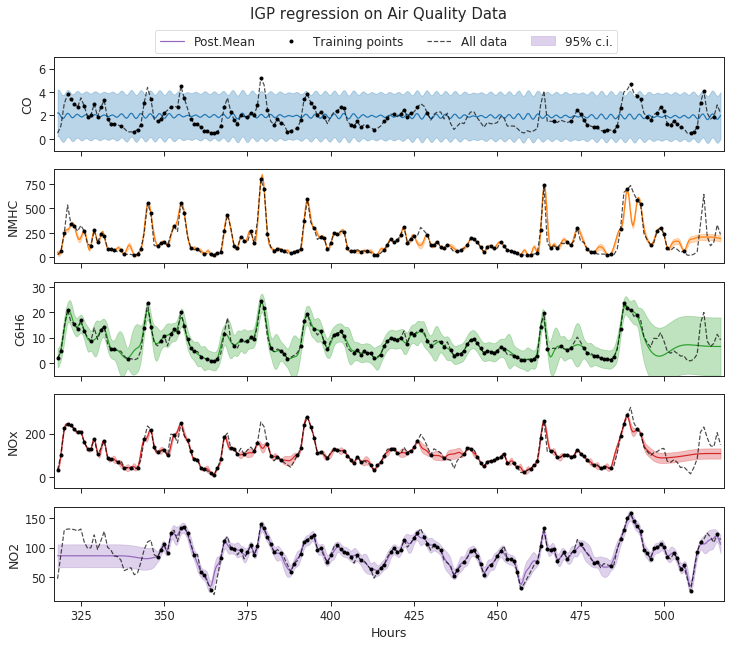

In [34]:
f, axarray = plt.subplots(5, 1, sharex=True, figsize=(12, 10))

for i in range(5):
    # plot post mean
    axarray[i].plot(x_pred, mean_list[i].reshape(-1), label='Post.Mean', c=sns.color_palette()[i])
    # error bars
    axarray[i].fill_between(x_pred.reshape(-1),
                            mean_list[i].reshape(-1) + 2 * std_list[i].reshape(-1),
                            mean_list[i].reshape(-1) - 2 * std_list[i].reshape(-1),
                            alpha=0.3,
                            label='95% c.i.',
                            color=sns.color_palette()[i]
                           )
    # plot trainning points
    axarray[i].plot(x_train[i], y_train[i], '.k', ms=6, label='Training points')
    # plot ground truth will all data
    idx = df2[cols[i]]!= -200
    axarray[i].plot(df2['time'][idx], df2[cols[i]][idx], '--k', label='All data', alpha=0.7)
    
    axarray[i].set_ylabel(cols[i][:-4])
    axarray[i].set_ylim(ylims[i])

plt.legend(fontsize=12, ncol=4, bbox_to_anchor=(0.35, 5.65, 0.5, 0.5))
plt.xlabel('Hours')
plt.xlim(df2['time'].values[0] - 1, df2['time'].values[-1] + 1)
plt.suptitle('IGP regression on Air Quality Data', y=0.95)
plt.savefig('img/air_quality_igp.pdf', bbox_inches='tight')

In [43]:
mse_total[4]

1006.9912629125257